# Assignment 2: Recognition using histograms, convolution and image filtering

## Exercise 1: Global approach to image description

a) Implement the function `myhist3` that computes a 3D histogram from a three channel image. The resulting histogram is stored in a 3D matrix. The size of the resulting histograms is determined by the parameter `n_bins`. Normalize the histogram.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [3]:
def myhist3(img, n_bins):
    hist = np.zeros((n_bins, n_bins, n_bins))
    step = 256 // n_bins

    for i in range(img.shape[0]):
        for j in range (img.shape[1]):
            r_bin = min(img[i,j,0] // step, n_bins-1)
            g_bin = min(img[i,j,1] // step, n_bins-1)
            b_bin = min(img[i,j,2] // step, n_bins-1)
            hist[r_bin, g_bin, b_bin] += 1

    hist = hist / np.sum(hist)
    return hist

In [4]:
img = cv2.imread("images/lincoln.jpg")
img1 = cv2.imread("images/lena.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

n_bins = 20
hist = myhist3(img, n_bins)
hist1 = myhist3(img1, n_bins)
tags = np.array([x for x in range(n_bins**3)])
#h = np.reshape(hist, (-1))
#plt.bar(tags, h, width=5)



b) In order to perform image comparison using histograms we need to implement some distance measures, defined for 2 input histograms, returning a scalar value representing the similarity. Implement a function `compare_histograms` that accepts thow histograms and a string that identifies the distance measure you wish to calculate. Start with the `L2 metric - Euclidean distance`. Also implement the following measures: `Chi-square distance`, `Intersection`, `Hellinger distance`. Try to avoid looping over histogram values and instead use vector opreations on entire matrices at once.

In [5]:
def euclidean(h1, h2):
    return np.sqrt(np.sum(np.square(h1 - h2)))

In [6]:
def chi_square(h1, h2):
    epsilon = 1e-10
    val = 0.5 * np.sum((np.square(h1 - h2)) / (h1 + h2 + epsilon))
    return val    

In [7]:
def intersection(h1, h2):
    res = 1 - np.sum(np.minimum(h1, h2))
    return res

In [8]:
def hellinger(h1, h2):
    return np.sqrt(0.5 * np.sum(np.square(np.sqrt(h1) - np.sqrt(h2))))

In [9]:
print(euclidean(hist, hist1))
print(chi_square(hist, hist1))
print(intersection(hist, hist1))
print(hellinger(hist, hist1))

0.314509647478371
0.999992328821122
0.9999961853027344
0.9998854629590217


c) Test your function with the following images:
 * `dataset/object_01_1.png`   
 * `dataset/object_02_1.png`   
 * `dataset/object_03_1.png` 

Compute a 8x8x8-bin histogram for each image. Reshape each of them into a 1D array and display them in the same window as well as the images. Compute the `L2` distance between histograms of object 1 and 2 as well as `L2` distance between histograms of objects 1 and 3

Q: Which image (2 or 3) is more similar to image 1 considering the L2 distance? How about the other 3 distances? We can see that all three histograms contain a strongly expressed component (one bin has a much higher value than the others). Which color does this bin represent?
A: According to L2 distance image 3 is more similar to image 1. Same goes for all the other distances. The peak is from the black color.

L2(h1, h2) 0.42630332471992644 
L2(h1, h3) 0.09507866927455817
chi_sq(h1, h2) 0.4321906396902619 
chi_sq(h1, h3) 0.13073834412304272
intersection(h1, h2) 0.6007080078125 
intersection(h1, h3) 0.197021484375
hellinger(h1, h2) 0.5745452717010868 
hellinger(h1, h3) 0.3206998595432886


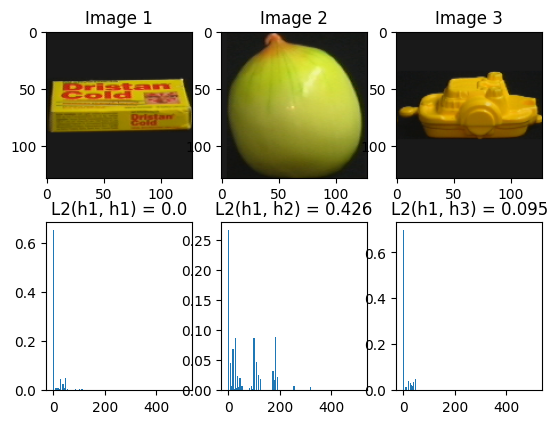

In [10]:
obj1 = cv2.cvtColor(cv2.imread("dataset/object_01_1.png"), cv2.COLOR_BGR2RGB)
obj2 = cv2.cvtColor(cv2.imread("dataset/object_02_1.png"), cv2.COLOR_BGR2RGB)
obj3 = cv2.cvtColor(cv2.imread("dataset/object_03_1.png"), cv2.COLOR_BGR2RGB)

n_bins = 8
tags = np.array([i for i in range(n_bins**3)])
h1 = myhist3(obj1, n_bins)
h2 = myhist3(obj2, n_bins)
h3 = myhist3(obj3, n_bins)

h1 = np.reshape(h1, -1, order="F")
h2 = np.reshape(h2, -1, order="F")
h3 = np.reshape(h3, -1, order="F")

edist12 = euclidean(h1, h2)
edist13 = euclidean(h1, h3)

cdist12 = chi_square(h1, h2)
cdist13 = chi_square(h1, h3)

idist12 = intersection(h1, h2)
idist13 = intersection(h1, h3)

hdist12 = hellinger(h1, h2)
hdist13 = hellinger(h1, h3)

plt.subplot(2,3,1)
plt.imshow(obj1)
plt.title("Image 1")

plt.subplot(2,3,4)
plt.bar(tags, h1, width=5)
plt.title(f"L2(h1, h1) = {round(euclidean(h1, h1), 3)}")

plt.subplot(2,3,2)
plt.imshow(obj2)
plt.title("Image 2")

plt.subplot(2,3,5)
plt.bar(tags, h2, width=5)
plt.title(f"L2(h1, h2) = {round(euclidean(h1, h2), 3)}")

plt.subplot(2,3,3)
plt.imshow(obj3)
plt.title("Image 3")

plt.subplot(2,3,6)
plt.bar(tags, h3, width=5)
plt.title(f"L2(h1, h3) = {round(euclidean(h1, h3), 3)}")

print("L2(h1, h2)", edist12, "\nL2(h1, h3)",edist13)
print("chi_sq(h1, h2)", cdist12, "\nchi_sq(h1, h3)",cdist13)
print("intersection(h1, h2)", idist12, "\nintersection(h1, h3)", idist13)
print("hellinger(h1, h2)", hdist12, "\nhellinger(h1, h3)",hdist13)


d) You will now implement a simple image retrieval system that will use histograms. Write a function that will accept the path to the image directory and the parameter n_bins and then calculate RGB histograms for all images in the directory as well as transform them to 1D arrays. Store the histograms in an appropriate data structure. \
Select some image from the directory dataset/ and compute the distance between its histogram and all the other histograms you calculated before. Sort the list according to the calculated similarity and display the reference image and the first five most similar images to it. Also display the corresponding histograms. Do this for all four distance measures that you implemented earlier.

In [11]:
def rgb_hist(path, n_bins):
    img_dict = {}

    for image in os.listdir(path):
        imname = os.path.join(path, image)

        img = cv2.imread(imname)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        hist = myhist3(img, n_bins)
        hist = np.reshape(hist, -1)

        img_dict[imname] = hist

    return img_dict



In [12]:
i_choose = "dataset/object_05_4.png"

n_bins = 16
img_dict = rgb_hist("dataset", n_bins)
distance_dict = {}

# get histogram of chosen image
custom_hist = img_dict[i_choose]

# get all distances, put in new dict
for imname in img_dict:
    hist = img_dict[imname]

    l2 = euclidean(custom_hist, hist)
    chi_sq = chi_square(custom_hist, hist)
    inter = intersection(custom_hist, hist)
    hell = hellinger(hist, custom_hist)

    res = [l2, chi_sq, inter, hell]
    distance_dict[imname] = res

In [13]:
# Get 5 most similar images
measures = {
    "euclidean": 0,
    "chi_square": 1,
    "intersection": 2,
    "hellinger": 3
}
#measure = "euclidean"
#measure = "chi_square"
#measure = "intersection"
measure = "hellinger"
distance_measure = measures[measure]
sorted_images = []

for i in range(len(distance_dict)):
    min_img = ""
    min_val = 1000
    for img in distance_dict:
        if (distance_dict[img][distance_measure] < min_val and img not in sorted_images):
            min_val = distance_dict[img][distance_measure]
            min_img = img
    sorted_images.append(min_img)

most_similar = sorted_images[:6]
print(most_similar)

['dataset/object_05_4.png', 'dataset/object_05_3.png', 'dataset/object_05_2.png', 'dataset/object_05_1.png', 'dataset/object_22_2.png', 'dataset/object_22_4.png']


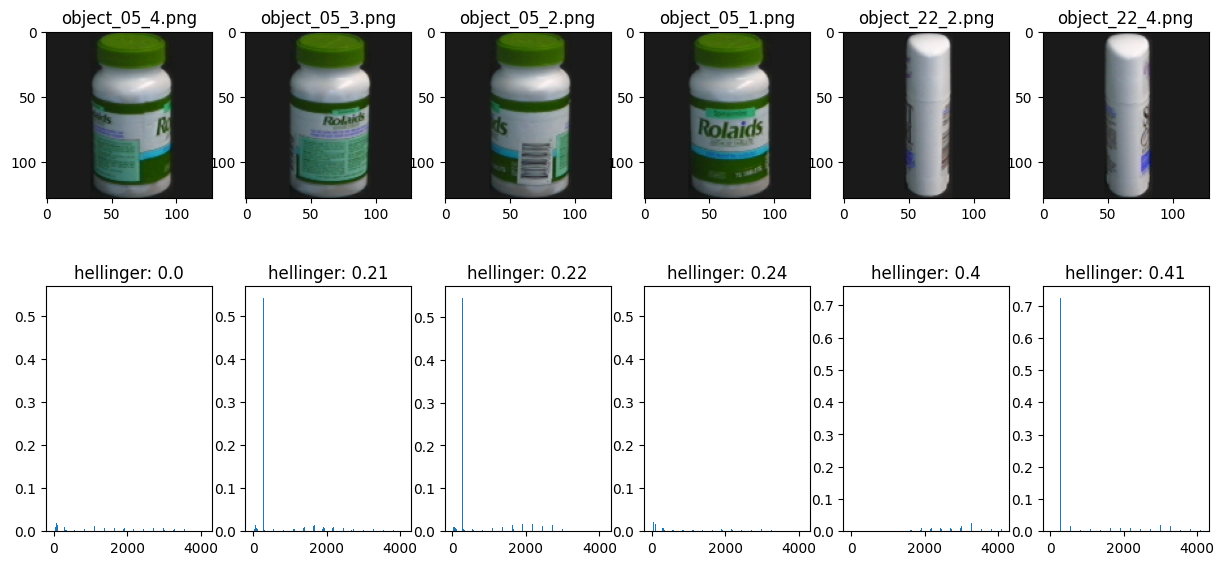

In [14]:
tags = np.array([i for i in range(n_bins**3)])
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(15,7))

i = 0
for image in most_similar:
    ax[0][i].imshow(cv2.imread(image))
    ax[0][i].set_title(image.lstrip("dataset/"))
    i+=1

i = 0
for image in most_similar:
    ax[1][i].bar(tags, img_dict[image], width=15)
    ax[1][i].set_title(f"{measure}: {round(distance_dict[image][distance_measure], 2)}")
    i += 1

Q: Which distance is in your opinion best suited for image retrieval? How does the retrieved sequence change if you use a different number of bins? Is the execution time affected by the number of bins? \
A: Distance measures are situational, so far the hellinger distance showed the best results. The retreived sequence changes if there were previously two images with very close score as the histogram is distributed slightly different. Yes, it is longer.

e) You can get a better sense of the differences in the distance values if you plot all of them at the same time. Use the function `plt.plot()` to display image indices on the x axis and distances to the reference image on the y axis. Display both the unsorted and the sorted image sequence and mark the most similar values using a circle.

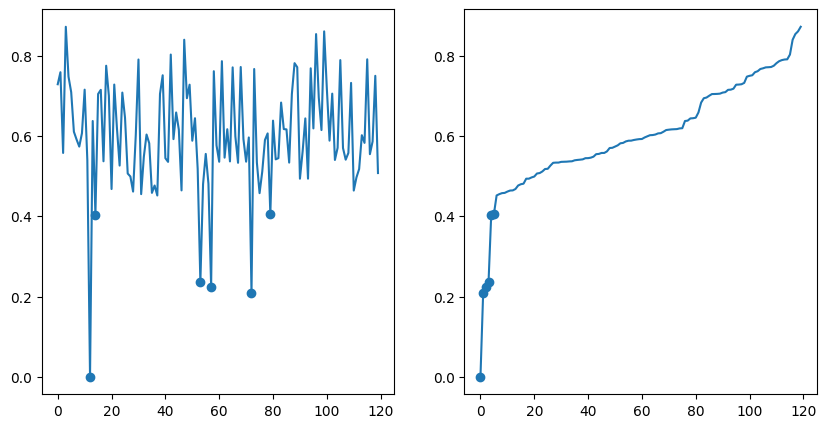

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

xs = np.array([i for i in range(len(distance_dict))])

marker_indexes = []

ys = np.array([])
i = 0
for image in distance_dict:
    if (image in most_similar):
        marker_indexes.append(i)
    ys = np.append(ys, distance_dict[image][3])
    i += 1

ax[0].plot(xs,ys, markevery=np.array(marker_indexes), marker="o")

ys = np.array([])
for image in sorted_images:
    ys = np.append(ys, distance_dict[image][3])

ax[1].plot(xs, ys, markevery=[0,1,2,3,4,5], marker="o", label="points")

f) This simple retrieval system is strongly influenced by dominant color that carry no discriminatrive information. Analyze the presence of different colors by summing up all image histograms bin-wise and displaying the resulting histogram. Which bins dominate this histogram? 

To address this issue, you will implement a simple frequency-based weighting tech-
nique, similar to the ones that are employed in document retrieval systems. Use the
combined frequency histogram you calculated to determine the weight for each bin.
The weights should be lower for bins that are strongly represented in the frequency
histogram and vice versa. One way of computing this weight is to use exponential
function `wi = e^(−λF(i))` , where F (i) represents a frequency of the i-th bin and λ is
a scaling constant that you have to set. There are also other ways of computing
weights that you can experiment with. Before calculating histogram similarity, you
should multiply each histogram with the weights vector bin-wise (and normalize
the result). Finally, you can compare the retrieval process for the weighted and
the unweighted histograms. Report your observations. Did the weighting help with
retrieving relevant results?

<BarContainer object of 4096 artists>

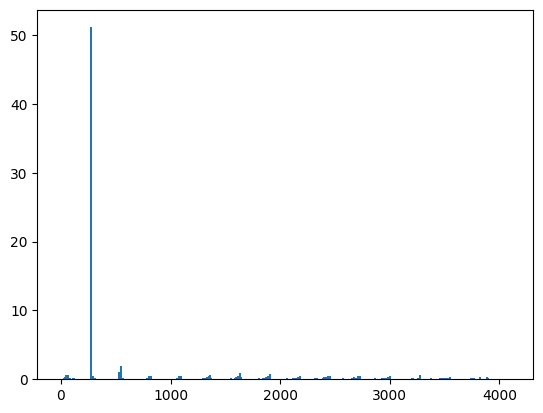

In [16]:
# Sum histograms bin-wise

cumulative_hist = np.zeros(n_bins**3)
for img in img_dict:
    cumulative_hist = np.add(cumulative_hist, img_dict[img])

# Bin with background color dominates
plt.bar(tags, cumulative_hist, width=19)

In [17]:
def get_weight(freq, my_lambda):
    return np.exp(-my_lambda * freq)

weights = []
my_lambda = 10000
s = np.sum(cumulative_hist)

# Get frequencies
for bin in cumulative_hist:
    weights.append(get_weight(bin, my_lambda))
print(np.mean(weights))

weighed_dist_dict = {}

# Get similarities
for img in img_dict:
    hist = img_dict[img]
    hist = np.multiply(weights, hist)
    hist = hist / np.sum(hist)

    l2 = euclidean(custom_hist, hist)
    chi_sq = chi_square(custom_hist, hist)
    inter = intersection(custom_hist, hist)
    hell = hellinger(hist, custom_hist)

    res = [l2, chi_sq, inter, hell]

    weighed_dist_dict[img] = res

0.5140072722033648


In [18]:
measures = {
    "euclidean": 0,
    "chi_square": 1,
    "intersection": 2,
    "hellinger": 3
}
#measure = "euclidean"
#measure = "chi_square"
#measure = "intersection"
measure = "hellinger"
distance_measure = measures[measure]
sorted_images = []

for i in range(len(weighed_dist_dict)):
    min_img = ""
    min_val = 1000
    for img in weighed_dist_dict:
        if (weighed_dist_dict[img][distance_measure] < min_val and img not in sorted_images):
            min_val = weighed_dist_dict[img][distance_measure]
            min_img = img
    sorted_images.append(min_img)

most_similar = sorted_images[:6]
print(most_similar)

['dataset/object_05_4.png', 'dataset/object_05_3.png', 'dataset/object_05_2.png', 'dataset/object_05_1.png', 'dataset/object_08_4.png', 'dataset/object_07_1.png']


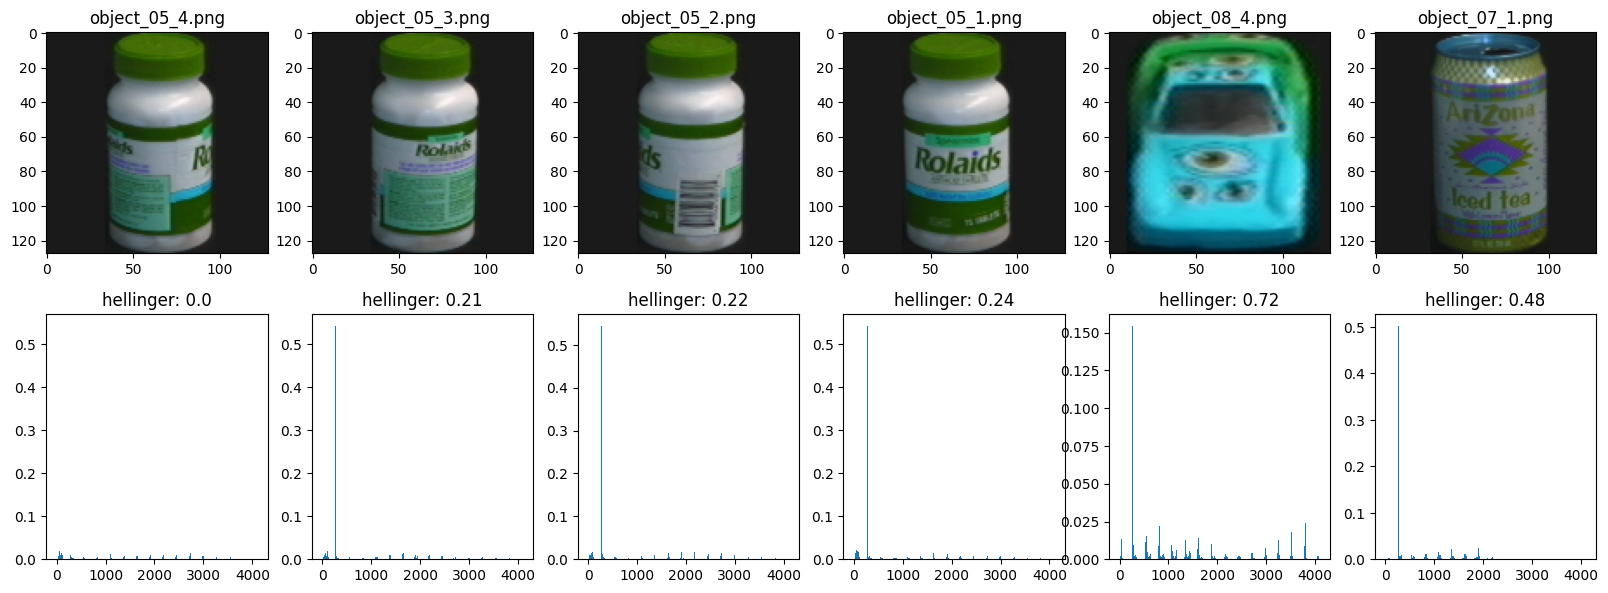

In [19]:
tags = np.array([i for i in range(n_bins**3)])
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(20,7))

i = 0
for image in most_similar:
    ax[0][i].imshow(cv2.imread(image))
    ax[0][i].set_title(image.lstrip("dataset/"))
    i+=1

i = 0
for image in most_similar:
    ax[1][i].bar(tags, img_dict[image], width=20)
    ax[1][i].set_title(f"{measure}: {round(distance_dict[image][distance_measure], 2)}")
    i += 1

Weighting made non-black colors more significant

## Exercise 2: Convolution

a) Compute the convolution between the signal and kernel below by hand


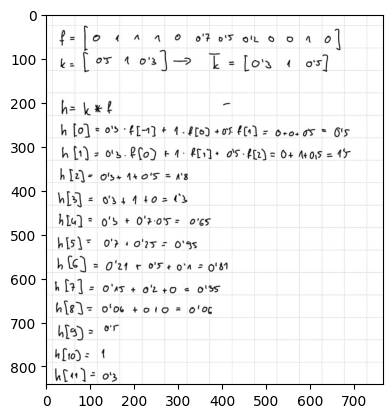

In [20]:
res = cv2.imread("convolution_by_hand.jpg")
plt.imshow(res)

res = [0.5, 1.5, 1.8, 1.3, 0.65, 0.95, 0.81, 0.35, 0.06, 0.5, 1, 0.3]

b) Implement the function `simple_convolution` that uses a 1D signal I and a kernel k of size 2N+1. The function should return the convolution between the two. To simplify, you only need to calculate the convolution on signal elements from i=N to i = |I| - N. The first anl last N elements of the signal will not be used. Test your implementation by loading the signal and the kernel usin gthe function `read_data` and performing the operation. Display the signal, the kernel and the result on the same figure. You can compare your result with the result of function cv2.filter2D. Note that the chape should be generally identical while the values at the edges of the results and the results' offset might be different.

In [21]:
def simple_convolution(signal, kernel):
    res = np.array([])
    kernel = kernel[::-1]

    for i in range(0, len(signal)-(len(kernel)//2)):
        signal_slice = signal[max(0, i) : min(i + len(kernel), len(signal))]
        kernel_slice = kernel[max(-i, 0) : len(signal)-i]
        res = np.append(res, np.dot(signal_slice, kernel_slice))
    return res


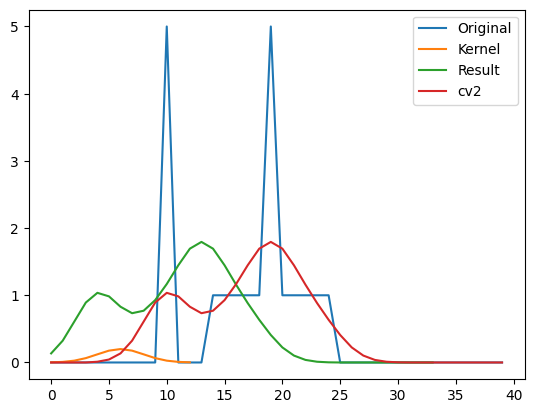

0.9999999974


In [22]:
from a2_utils import *

signal = read_data("signal.txt")
kernel = read_data("kernel.txt")

convolved = simple_convolution(signal, kernel)
cv2_convolved = cv2.filter2D(signal, -1, kernel=kernel[::-1])

xs = [i for i in range(len(signal))]

plt.plot(xs[:len(signal)], signal, label="Original")
plt.plot(xs[:len(kernel)], kernel, label="Kernel")
plt.plot(xs[:len(convolved)], convolved, label="Result")
plt.plot(xs[:len(cv2_convolved)], cv2_convolved, label="cv2")
plt.legend()
plt.show()

print(np.sum(kernel))


Q: Can you recognize the shape of the kernel? What is the sum of the elements in the kernel? How does the kernel affect the signal? \
A: It's a gaussian kernel. The sum of the elements is 1. It smoothes the signal.

c) Improve the function `simple_convolution` by also addressing the edges of the signal. To do this, implement one of the common methods for padding the signal so the operation can be performed on all the signal elements. Take care that the input and the output signals are the same length

In [23]:
def not_so_simple_convolution(signal, kernel):
    res = np.array([])
    kernel = kernel[::-1]
    for i in range(-len(kernel)+1, len(signal)):
        out_of_range = 1 if len(signal) > len(kernel) else 0
         
        signal_slice = signal[max(0, i) : min(i + len(kernel), len(signal))]
        kernel_slice = kernel[max(-i, 0) : len(signal) - i * out_of_range]
        res = np.append(res, np.dot(signal_slice, kernel_slice))
    return res

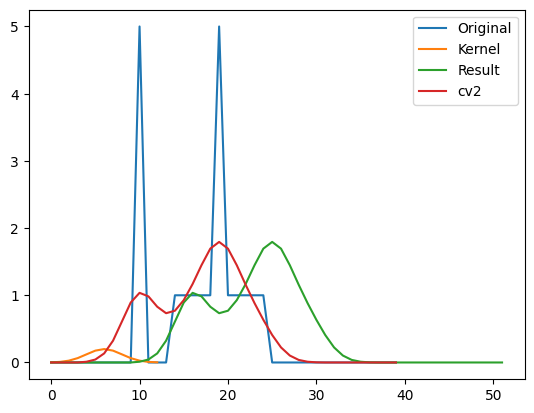

0.9999999974


In [24]:
signal = read_data("signal.txt")
kernel = read_data("kernel.txt")

convolved = not_so_simple_convolution(signal, kernel)
cv2_convolved = cv2.filter2D(signal, -1, kernel=kernel[::-1])

xs = [i for i in range(52)]

plt.plot(xs[:len(signal)], signal, label="Original")
plt.plot(xs[:len(kernel)], kernel, label="Kernel")
plt.plot(xs[:len(convolved)], convolved, label="Result")
plt.plot(xs[:len(cv2_convolved)], cv2_convolved, label="cv2")
plt.legend()
plt.show()

print(np.sum(kernel))

d) Write a function that calculates a Gaussian kernel. Use the definition. The input to the function should be parameter sigma, which defines the shape of the kernel. Because the values beyond 3sigma are very small we usually limit the kernel size to 2 * [3*sigma] + 1. Dont forget to normalize the kernel. Generate kernels for different values of sigma. and display them on the same figure.

In [25]:
import math
def gaussian_kernel(sigma):
    return np.array([1 / (np.sqrt(2*np.pi) * sigma) * np.exp((-np.square(x)) / (2 * np.square(sigma))) for x in np.arange(-math.ceil(3*sigma), math.ceil(3*sigma)+1, 1)])

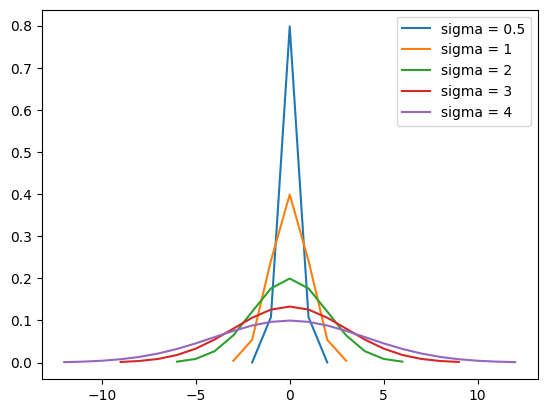

In [26]:
xs = [i for i in range(-1000, 1000)]
k1 = gaussian_kernel(0.5)
k2 = gaussian_kernel(1)
k3 = gaussian_kernel(2)
k4 = gaussian_kernel(3)
k5 = gaussian_kernel(4)

plt.plot(xs[1000-len(k1)//2:1000+math.ceil(len(k1)/2)], k1, label="sigma = 0.5")
plt.plot(xs[1000-len(k2)//2:1000+math.ceil(len(k2)/2)], k2, label="sigma = 1")
plt.plot(xs[1000-len(k3)//2:1000+math.ceil(len(k3)/2)], k3, label="sigma = 2")
plt.plot(xs[1000-len(k4)//2:1000+math.ceil(len(k4)/2)], k4, label="sigma = 3")
plt.plot(xs[1000-len(k5)//2:1000+math.ceil(len(k5)/2)], k5, label="sigma = 4")
plt.legend()

Q: The figure below shows two kernels (a) and (b) as well as signal (c).
Sketch (do not focus on exact proportions of your drawing but rather on the under-
standing of what you are doing) the resulting convolved signal of the given input
signal and each kernel. \


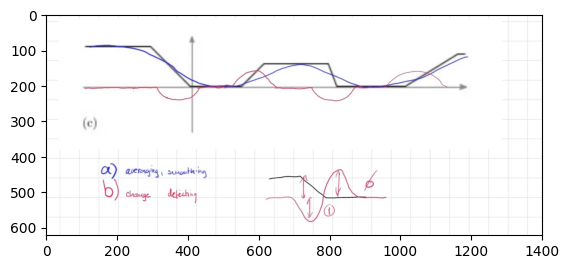

In [27]:
a = cv2.imread("2d.jpg")
plt.imshow(a)

e) The main advantage of convolution in comparison to correlation is the associativity
of operations. This allows us to pre-calculate multiple kernels that we want to use
on an image. Test this property by loading the signal from `signal.txt` and then
performing two consecutive convolutions on it. The first one will be with a Gaussian
kernel `k 1 with σ = 2` and the second one will be with kernel `k 2 = [0.1, 0.6, 0.4]`. Then,
convolve the signal again, but switch the order of the operations. Finally, create a
6kernel `k 3 = k 1 ∗k 2` and perform the convolution of the original signal with it. Display
all the resulting signals and comment on the effect the different order of operations
has on the signal. Use the function from c) or cv2.filter2D() to take care of the
edges when convolving.

Text(0.5, 1.0, 's * (k1 * k2)')

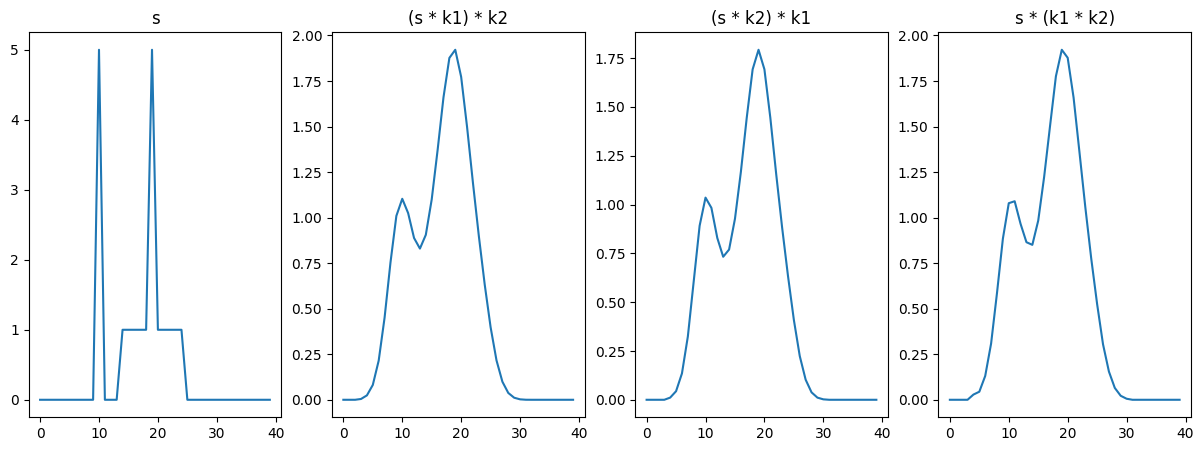

In [28]:
signal = read_data("signal.txt")
k1 = np.array(gaussian_kernel(2))
k2 = np.array([0.1, 0.6, 0.4])

test01 = cv2.filter2D(signal, -1, k1)
test11 = cv2.filter2D(test01, -1, k2)

test02 = cv2.filter2D(signal, -1, k2)
test22 = cv2.filter2D(signal, -1, k1)

k3 = cv2.filter2D(k1, -1, k2)
test33 = cv2.filter2D(signal, -1, k3)

fig, ax = plt.subplots(1, 4, figsize=(15, 5))

ax[0].plot(signal)
ax[0].set_title("s")

ax[1].plot(test11)
ax[1].set_title("(s * k1) * k2")

ax[2].plot(test22)
ax[2].set_title("(s * k2) * k1")

ax[3].plot(test33)
ax[3].set_title("s * (k1 * k2)")


## Exercise 3: Image filtering

a) We get the same result if we filter a 2-D signal using a single 2-D
Gaussian kernel or if we do it using two 1D Gaussian kernels that represent the
separated components of the former 2-D Gaussian kernel. This technique can be
used to translate a slow n-D filtering operation to a fast sequence of 1-D filtering
operations.
Write a function gaussfilter that generates a Gaussian filter and applies it to a
2-D image. You can use the function cv2.filter2D() to perform the convolution
using the desired kernel. Generate a 1-D Gaussian kernel and first use it to filter the image along the first dimension, then convolve the result using the same kernel,
but transposed. \
Test the function by loading the image lena.png and converting it to grayscale.
Then, corrupt the image with Gaussian noise (every pixel value is offset by a ran-
dom number sampled from the Gaussian distribution) and separately with salt-
and-pepper noise. You can use the functions gauss_noise and sp_noise that are
included with the instructions (a2_utils.py). Use the function gaussfilter to try
and remove noise from both images.

Text(0.5, 1.0, 'Filtered Salt and pepper')

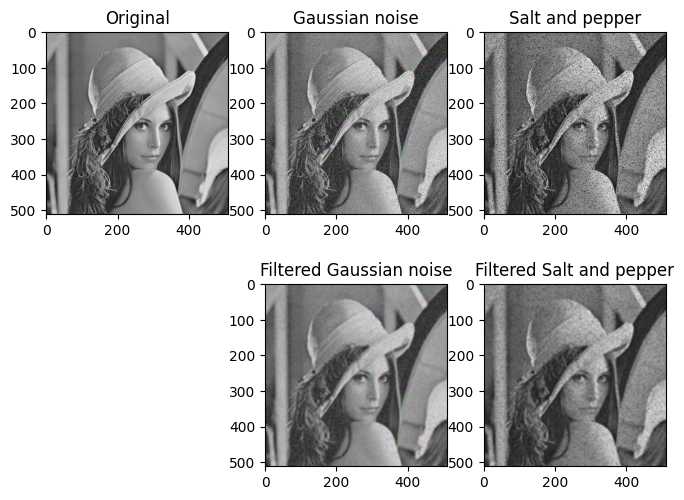

In [29]:
def gaussfilter(img, sigma=2):
    # convert to numpy array
    img = np.array(img)

    kernel = cv2.getGaussianKernel(7, sigma)
    #kernel = gaussian_kernel(1)
    # Convolve on x axis
    img = cv2.filter2D(img, -1, kernel[::-1])
    #plt.subplot(1,2,1)
    #plt.imshow(img)

    # Convolve on y axis
    kernel = np.reshape(kernel, (1, -1))    
    img = cv2.filter2D(img, -1, kernel[::-1])
    #plt.subplot(1,2,2)
    #plt.imshow(img)
    return img


img = cv2.imread("images/lena.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

img_gauss = gauss_noise(img, 25)
img_gauss = img_gauss.astype(np.uint8)

img_sp = sp_noise(img)

filtered_gauss = gaussfilter(img_gauss)
filtered_sp = gaussfilter(img_sp)

fig, ax = plt.subplots(2, 3, figsize=(8,6))
ax[0][0].imshow(img)
ax[0][0].set_title("Original")

ax[0][1].imshow(img_gauss)
ax[0][1].set_title("Gaussian noise")

ax[0][2].imshow(img_sp)
ax[0][2].set_title("Salt and pepper")

ax[1][0].set_axis_off()

ax[1][1].imshow(filtered_gauss)
ax[1][1].set_title("Filtered Gaussian noise")

ax[1][2].imshow(filtered_sp)
ax[1][2].set_title("Filtered Salt and pepper")

Q: Which noise is better removed using the Gaussian filter? \
A: Gaussian noise.

b) Convolution can also be used for image sharpening. Look at its definition in the lecture slides and implement it. Test is on the image from file `museum.jpg`.

Text(0.5, 1.0, 'Sharpened')

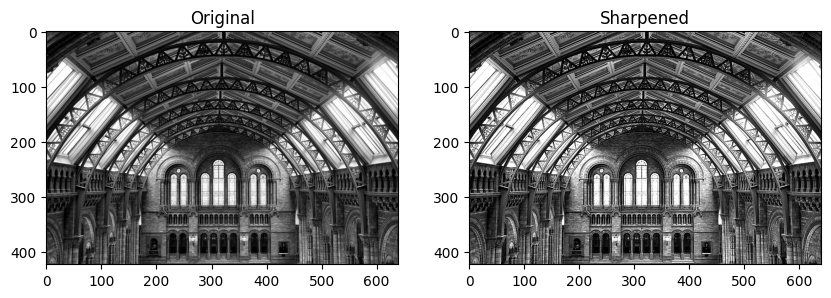

In [30]:
img = cv2.imread("images/museum.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

#kernel = np.array([[0,-1,0], [-1,5,-1],[0,-1,0]])
kernel = np.array([[-0.1, -0.1, -0.1], [-0.1, 2, -0.1], [-0.1, -.1, -.1]])
#kernel = np.array([[0,0,0],[0,2,0],[0,0,0]])

sharp = cv2.filter2D(img, -1, kernel)

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].imshow(img)
ax[0].set_title("Original")

ax[1].imshow(sharp)
ax[1].set_title("Sharpened")

c) Implement a nonlinear median filter. While a Gaussian filter locally computes a weighed average, the median filter sorts the signal values in the given  filter window and uses the median value of the sorted sequence as the result. Implement a simple median filter as a function `simple_median` that takes the input signal `I` and the filter width `w` and returns the filtered signal. \
Create a 1D signal corrupted with salt and pepper noise and filter it using simple_median. Display the result using different window sizes. Also try to remove the noise using the Gaussian filter. What does the result look like and why?

In [31]:
def simple_median(img, width):
    res = img.copy()
    step = width//2
    for i in range(len(img)):
        img_slice = img[max(0, i-step) : min(len(img)-1, i+step)]
        res[i] = np.median(img_slice)
    return res

Text(0.5, 1.0, 'Gauss')

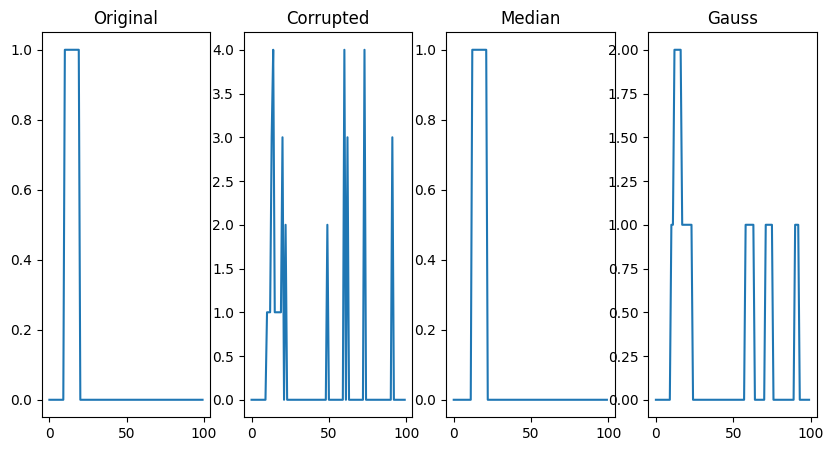

In [32]:
signal = [0 for i in range(100)]
for i in range(10, 20):
    signal[i] = 1 
signal = np.array(signal)

signal_pepper = signal.copy().astype(np.uint8)

# 10% of the signal is noise
for i in range(10):
    index = np.random.randint(signal.shape[0])
    signal_pepper[index] = int(np.random.randint(1,5))

filtered_median = simple_median(signal_pepper, 10)
filtered_median = simple_median(filtered_median, 10)
filtered_gauss = gaussfilter(signal_pepper)

fig, ax = plt.subplots(1,4,figsize=(10,5))

ax[0].plot(signal)
ax[0].set_title("Original")

ax[1].plot(signal_pepper)
ax[1].set_title("Corrupted")

ax[2].plot(filtered_median)
ax[2].set_title("Median")

ax[3].plot(filtered_gauss)
ax[3].set_title("Gauss")


Q: Which filter performs better at this specific task? In comparison to Gaussian filter that can be applied multiple times in any order, does the order matter in case of median filter? What is the name of filters like this? \
A: Median filter performs better. Yes, it matters. Non-linear filters. The Gauss filter averages the values in given window, so the random noise is still present.

d) Implement a 2D version of the median filter. Test it on an image that was corrupted by Gaussian noise and on an image that was corrupted by salt and pepper noise. Compare the results with the Gaussian filter for multiple noise intesities and filter sizes.

In [33]:
def simple_median_2d(img, width):
    res = img.copy()
    step = width // 2
    for i in range(res.shape[0]):
        y_slice_top = max(i-step, 0)
        y_slice_bottom = min(i+step, res.shape[1]-1)
        for j in range(res.shape[1]):
            x_slice_left = max(j-step, 0)
            x_slice_right = min(j+step, res.shape[0]-1)
            median = np.median(img[y_slice_top:y_slice_bottom, x_slice_left:x_slice_right])
            #print(f"img[{i},{j}]={median}")
            #print(f"({x_slice_left}, {y_slice_top}) ({x_slice_right}, {y_slice_top})\n({x_slice_left}, {y_slice_bottom})  ({x_slice_right}, {y_slice_bottom})")
            res[i][j]= median
    return res


In [34]:
from UZ_utils import *

img = cv2.imread("images/lena.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'Median filtered sp')

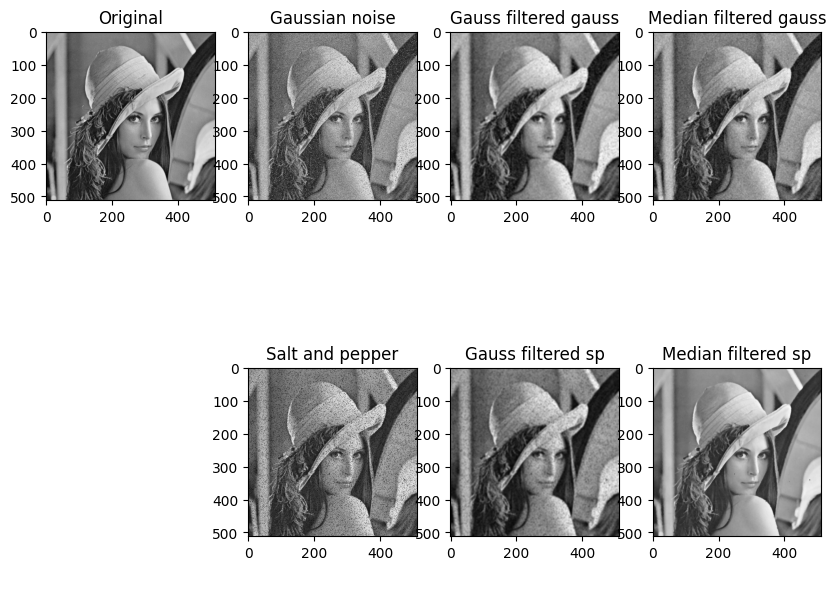

In [35]:

img_gauss = gauss_noise(img, 25)
img_gauss = img_gauss.astype(np.uint8)

img_sp = sp_noise(img)

gauss_filtered_gauss = gaussfilter(img_gauss)
gauss_filtered_sp = gaussfilter(img_sp)

median_filtered_gauss = simple_median_2d(img_gauss, 5)
median_filtered_sp = simple_median_2d(img_sp, 5)
median_filtered_gauss = median_filtered_gauss.astype(np.float64)
median_filtered_sp = median_filtered_sp.astype(np.uint8)

fig, ax = plt.subplots(2, 4, figsize=(10,8))
ax[0][0].imshow(img, cmap="gray")
ax[0][0].set_title("Original")

ax[0][1].imshow(img_gauss, cmap="gray")
ax[0][1].set_title("Gaussian noise")

ax[0][2].imshow(gauss_filtered_gauss, cmap="gray")
ax[0][2].set_title("Gauss filtered gauss")

ax[0][3].imshow(median_filtered_gauss, cmap="gray")
ax[0][3].set_title("Median filtered gauss")

ax[1][0].set_axis_off()

ax[1][1].imshow(img_sp, cmap="gray")
ax[1][1].set_title("Salt and pepper")

ax[1][2].imshow(gauss_filtered_sp, cmap="gray")
ax[1][2].set_title("Gauss filtered sp")

ax[1][3].imshow(median_filtered_sp, cmap="gray")
ax[1][3].set_title("Median filtered sp")

Q: What is the computational complexity of the Gaussian filter operation? How about the median filter? What does it depend on? Describe the computational complexity using the O(·) notation (you can assume n log n complexity for sorting).
A: Gaussian filter has complexity of `O(nw)` where `n` is the number of pixels and `w` is kernel width. Median filter has complexity of `O(n w^2 log w^2)` where `n` is the number of pixels and `w` is the window size (w^2 pixels sorted n times).

e) Implement the hybrid image merging that was presented at the lectures. To do this you will have to implement the Laplacian filter. Filter the images (one with the Gaussian and one with the Laplacian filter) and merge them together
(regular or weighted average). You can use images lincoln.jpg and obama.jpg.
Hint: To get good results, experiment with different kernel sizes for each operation
and different weights when merging images.

In [36]:
# Unit - gaussian
def laplacian(img, sigma=2):
    unit_impulse = np.zeros(2 * math.ceil(3 *sigma) + 1)
    unit_impulse[len(unit_impulse)//2 + 1] = 1
    gauss_kernel = gaussian_kernel(sigma)

    laplacian_kernel = unit_impulse - gauss_kernel

    # 2x 1d convolution
    img = cv2.filter2D(img, -1, laplacian_kernel)

    laplacian_kernel = np.reshape(laplacian_kernel, (1, -1))
    img = cv2.filter2D(img, -1, laplacian_kernel)

    return img

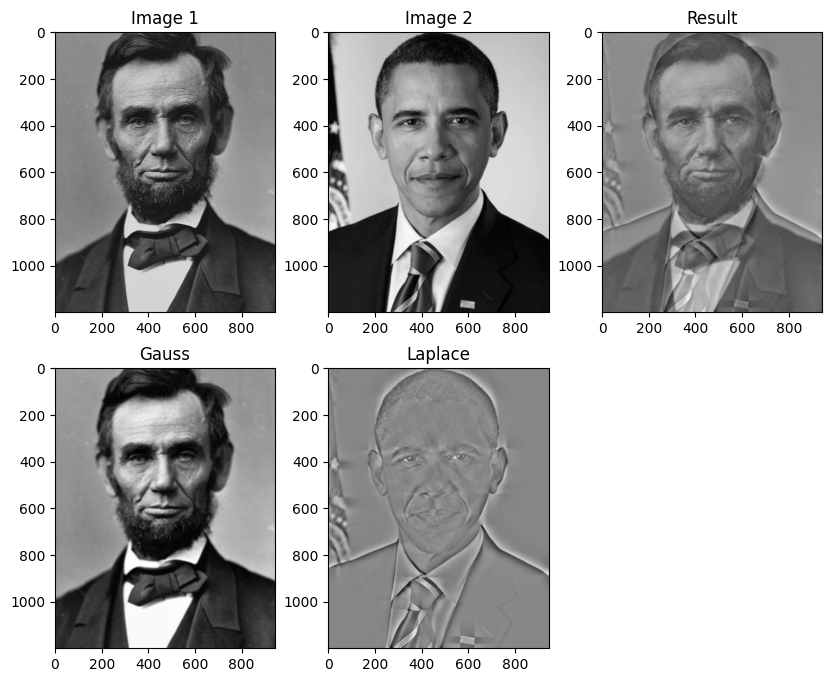

In [37]:
lincoln = cv2.imread("images/lincoln.jpg")
obama = cv2.imread("images/obama.jpg")

lincoln = cv2.cvtColor(lincoln, cv2.COLOR_BGR2GRAY)
obama = cv2.cvtColor(obama, cv2.COLOR_BGR2GRAY)

lincoln = lincoln.astype(np.float64)
obama = obama.astype(np.float64)

sigma = 40

lincoln_filtered = gaussfilter(lincoln, sigma)
obama_filtered = laplacian(obama, sigma)

joined = (lincoln_filtered + obama_filtered) / 2 

fig, ax = plt.subplots(2, 3, figsize=(10, 8))
ax[0][0].imshow(lincoln, cmap="gray")
ax[0][0].set_title("Image 1")

ax[0][1].imshow(obama, cmap="gray")
ax[0][1].set_title("Image 2")

ax[0][2].imshow(joined, cmap="gray")
ax[0][2].set_title("Result")

ax[1][0].imshow(lincoln_filtered, cmap="gray")
ax[1][0].set_title("Gauss")

ax[1][1].imshow(obama_filtered, cmap="gray")
ax[1][1].set_title("Laplace")

ax[1][2].set_axis_off()